### Data Preprocessing

In [1]:
# STEP 1: Data Preprocessing
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
# --- Parameters ---
img_size = 64
num_classes = 30
dataset_path = r"D:\Milestone -3 (ML)\Road Signs classification dataset-20250322T134616Z-001\Road Signs classification dataset\DATA"

In [3]:
# --- Function to Load Images ---
def load_images_from_folder(folder_path, img_size):
    X, y = [], []
    class_dirs = sorted([d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))])
    for label in class_dirs:
        class_folder = os.path.join(folder_path, label)
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                X.append(img)
                y.append(int(label))
    return np.array(X), np.array(y)

In [4]:
# --- Load Training Data ---
print("[INFO] Loading training images...")
X, y = load_images_from_folder(dataset_path, img_size)
print(f"[INFO] Loaded {len(X)} images.")

[INFO] Loading training images...
[INFO] Loaded 743 images.


In [5]:
# --- Normalize Images ---
X = X.astype("float32") / 255.0

In [6]:
# --- Visualize Samples from Training Set ---
def visualize_samples(X, y, samples_per_class=5):
    y_labels = np.argmax(y, axis=1)
    num_classes = len(np.unique(y_labels))
    plt.figure(figsize=(samples_per_class * 2, num_classes * 2))

    for class_id in range(num_classes):
        class_indices = np.where(y_labels == class_id)[0]
        selected_indices = np.random.choice(class_indices, min(samples_per_class, len(class_indices)), replace=False)

        for i, idx in enumerate(selected_indices):
            plt_idx = class_id * samples_per_class + i + 1
            plt.subplot(num_classes, samples_per_class, plt_idx)
            plt.imshow(X[idx])
            plt.axis('off')
            plt.title(f"Class {class_id}", fontsize=8)

    plt.tight_layout()
    plt.show()

In [7]:
import matplotlib.pyplot as plt

def visualize_predictions(X, y_true, y_pred, class_names=None, count=15):
    plt.figure(figsize=(15, 8))
    for i in range(count):
        idx = np.random.randint(0, len(X))
        plt.subplot(3, 5, i+1)
        plt.imshow(X[idx])
        plt.axis("off")
        true_label = class_names[y_true[idx]] if class_names else f"True: {y_true[idx]}"
        pred_label = class_names[y_pred[idx]] if class_names else f"Pred: {y_pred[idx]}"
        plt.title(f"{true_label} / {pred_label}", fontsize=9)
    plt.tight_layout()
    plt.show()

In [8]:
class_names = [f"Class {i}" for i in range(30)] 

### CNN Model

In [9]:
#Keras-sequential model - to build cnn layer by layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting

    # Output Layer (30 classes)
    Dense(30, activation='softmax')
])

C:\Users\AKILAN J\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Get the model to learn by choosing  how it should learn
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,629,022 (6.21 MB)

 Trainable params: 1,629,022 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# --- Convert Labels to Categorical (One-Hot) ---
y_image = to_categorical(y, num_classes=num_classes)

In [15]:
# --- Split into Training and Validation Sets ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y_image, test_size=0.15, random_state=42, stratify=y
)

In [16]:
print(f"[INFO] Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")

[INFO] Training samples: 631, Validation samples: 112


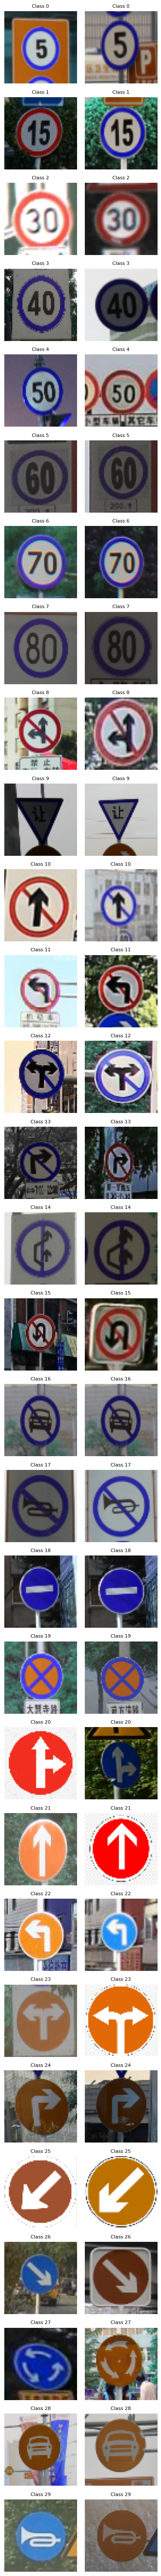

In [17]:
# --- Call Visualization ---
visualize_samples(X_train, y_train, samples_per_class=2)

In [18]:
# Predict class indices from model
y_train_preds = np.argmax(model.predict(X_train), axis=1)

# Convert true labels from one-hot to class indices
y_train_true = np.argmax(y_train, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


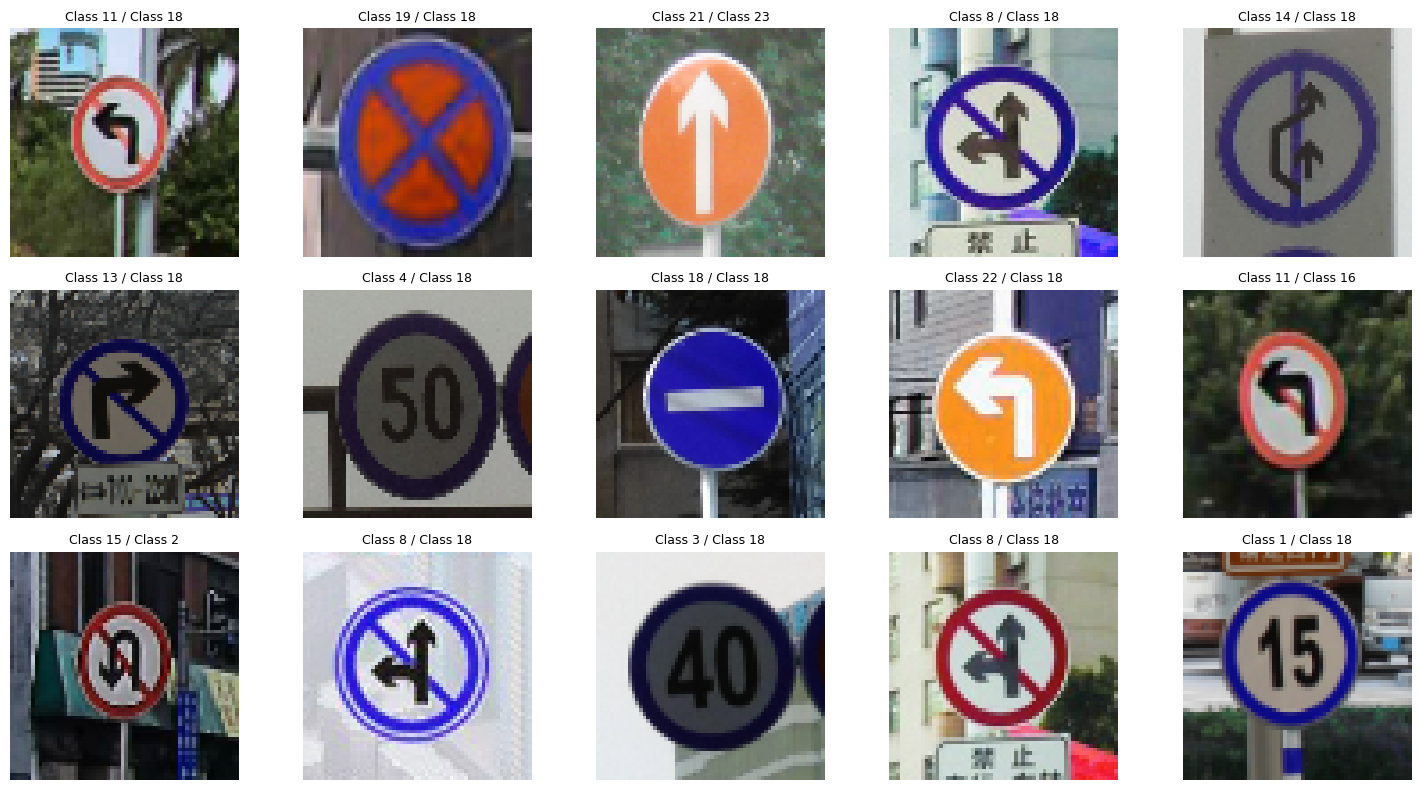

In [19]:
# Call the visualization function
visualize_predictions(X_train, y_train_true, y_train_preds, class_names)

### Training CNN with Data Augmentation

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [21]:
# Callbacks-saves the best model,avoid overfitting by stopping at right time
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)

In [26]:
# Train the model
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=30,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/30
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0382 - loss: 3.4925

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0418 - loss: 3.4776 - val_accuracy: 0.1786 - val_loss: 3.1173
Epoch 2/30
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1931 - loss: 2.9781

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1972 - loss: 2.9608 - val_accuracy: 0.4911 - val_loss: 2.3222
Epoch 3/30
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4168 - loss: 2.2486

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4214 - loss: 2.2245 - val_accuracy: 0.7232 - val_loss: 1.4855
Epoch 4/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5856 - loss: 1.5398

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5893 - loss: 1.5267 - val_accuracy: 0.8214 - val_loss: 0.8783
Epoch 5/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7638 - loss: 0.9050

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7630 - loss: 0.9015 - val_accuracy: 0.8839 - val_loss: 0.5950
Epoch 6/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8387 - loss: 0.5619

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8384 - loss: 0.5640 - val_accuracy: 0.9286 - val_loss: 0.4989
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8912 - loss: 0.4118 - val_accuracy: 0.9107 - val_loss: 0.3755
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9142 - loss: 0.3537 - val_accuracy: 0.9286 - val_loss: 0.3681
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9054 - loss: 0.3304

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9062 - loss: 0.3285 - val_accuracy: 0.9554 - val_loss: 0.3482
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9411 - loss: 0.2051 - val_accuracy: 0.9107 - val_loss: 0.3971
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9366 - loss: 0.2111 - val_accuracy: 0.9286 - val_loss: 0.3595
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9557 - loss: 0.1940 - val_accuracy: 0.9375 - val_loss: 0.3121
Epoch 13/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9540 - loss: 0.1422 - val_accuracy: 0.9286 - val_loss: 0.3274
Epoch 14/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9732 - loss: 0.1413 - val_accuracy: 0.9375 - val_loss: 0.3366
Epoch 15/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9621 - loss: 0.1273 - val_accuracy: 0.9286 - val_loss: 0.2918
Epoch 16/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9568 - loss: 0.1144 - val_accuracy: 0.9286 - val_l

In [27]:
from sklearn.metrics import classification_report

In [28]:
# Step 1: Predict class probabilities on training set
y_train_pred_probs = model.predict(X_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [29]:
# Step 2: Get class predictions
y_train_pred_classes = np.argmax(y_train_pred_probs, axis=1)

In [30]:
# Step 3: Convert one-hot encoded true labels back to class labels
y_train_true_classes = np.argmax(y_train, axis=1)

In [31]:
# Step 4: Generate classification report
print("Classification Report on Training Data:")
print(classification_report(y_train_true_classes, y_train_pred_classes))

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        21
           7       1.00      0.95      0.98        21
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.

### Model Evaluation on Test Data

In [32]:
# Use the same function as before
X_test, y_test = load_images_from_folder(r"D:\Milestone -3 (ML)\Road Signs classification dataset-20250322T134616Z-001\Road Signs classification dataset\TEST",img_size)
X_test = X_test.astype("float32") / 255.0

In [33]:
from tensorflow.keras.models import load_model

# Load the best model (update the filename if you're using `.keras`)
model = load_model("best_model.h5")

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Get class predictions
y_pred_classes = np.argmax(y_pred_probs, axis=1)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.80      0.67      0.73         6
           2       0.43      1.00      0.61        10
           3       0.67      0.50      0.57         4
           4       0.50      0.50      0.50        12
           5       0.50      0.05      0.09        21
           6       0.00      0.00      0.00        15
           7       1.00      0.33      0.50         3
           8       1.00      1.00      1.00         6
           9       0.40      0.25      0.31         8
          10       1.00      1.00      1.00        12
          11       0.83      0.86      0.84        22
          12       1.00      0.89      0.94         9
          13       0.65      1.00      0.79        11
          14       1.00      0.50      0.67         2
          15       0.46      0.87      0.60        15
          16       0.42      0.73      0.53        11
    

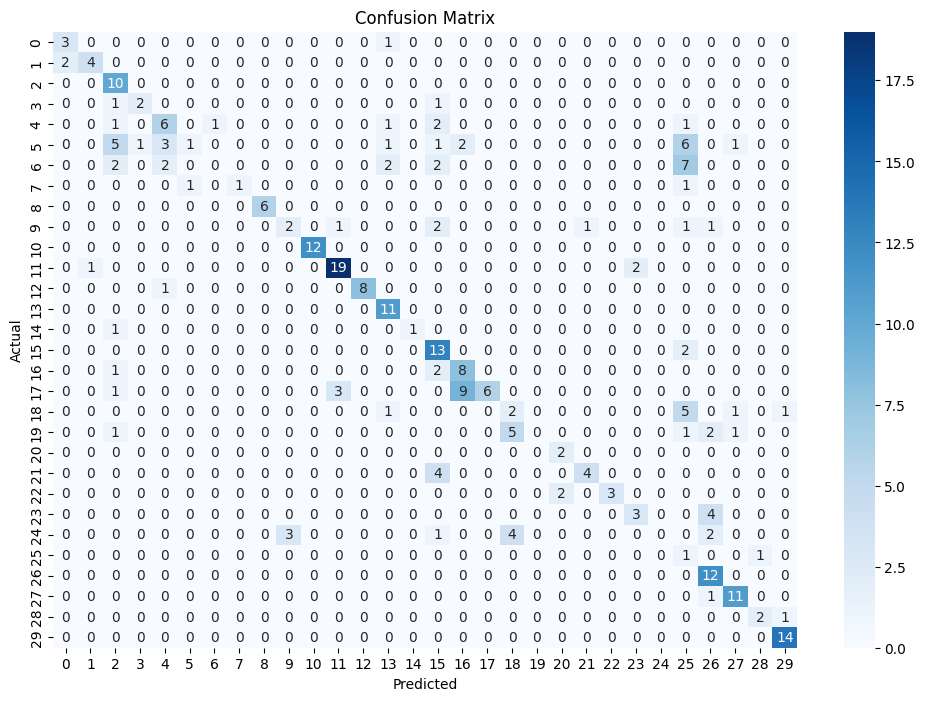

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [37]:
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred_classes))

Test Accuracy: 0.5859649122807018


### Hyper parameter tuning

In [38]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
# Define a Tuner-Compatible Mode
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(hp):
    model = Sequential()

    model.add(Conv2D(
        filters=hp.Choice('conv_1_filters', values=[32, 64, 128]),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(img_size, img_size, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Choice('conv_2_filters', values=[64, 128]),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))

    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.3, max_value=0.5, step=0.1)))

    model.add(Dense(30, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [40]:
# Initialize the Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    directory='kt_logs',
    project_name='road_signs_tuning'
)

Reloading Tuner from kt_logs\road_signs_tuning\tuner0.json


In [42]:
# Run the Tuning
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10,
    callbacks=[early_stop]
)

In [43]:
# Retrieve and Train the Best Model
# Used Keras Tuner to test different model setups
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Conv1 Filters: {best_hps.get('conv_1_filters')}")
print(f"Conv2 Filters: {best_hps.get('conv_2_filters')}")
print(f"Dense Units: {best_hps.get('dense_units')}")
print(f"Dropout Rate: {best_hps.get('dropout_rate')}")

Best Hyperparameters:
Conv1 Filters: 64
Conv2 Filters: 128
Dense Units: 256
Dropout Rate: 0.5


In [45]:
# Build and train best model
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.0481 - loss: 3.5930 - val_accuracy: 0.2054 - val_loss: 3.1547
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.1847 - loss: 3.0167 - val_accuracy: 0.4732 - val_loss: 2.3763
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4623 - loss: 2.0871 - val_accuracy: 0.7679 - val_loss: 1.3819
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7300 - loss: 1.1491 - val_accuracy: 0.8571 - val_loss: 0.7262
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8604 - loss: 0.5714 - val_accuracy: 0.9107 - val_loss: 0.5783
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9211 - loss: 0.3305 - val_accuracy: 0.8929 - val_loss: 0.4577
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9325 - loss: 0.2263 - val_accuracy: 0.9107 - val_loss: 0.4390
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9538 - loss: 0.1709 - val_accuracy: 0.9107 - v

In [46]:
# Save the best tuned model
from tensorflow.keras.models import load_model

best_model.save(r"D:\Milestone -3 (ML)\Models\best_tuned_model.keras")

## Streamlit

In [47]:
!pip install streamlit


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
%%writefile app.py

import streamlit as st
import numpy as np
import cv2
import pandas as pd
from PIL import Image
from tensorflow.keras.models import load_model

# --- Load class labels from CSV ---
labels_df = pd.read_csv(r"D:\Milestone -3 (ML)\Road Signs classification dataset-20250322T134616Z-001\Road Signs classification dataset\labels.csv")  # Make sure it's in the same directory
class_names = labels_df.set_index("ClassId")["Name"].to_dict()

# --- Load the trained model ---
model = load_model(r"D:\Milestone -3 (ML)\Models\best_tuned_model.keras")
img_size = 64

# --- Streamlit UI ---
st.title(" Road Sign Classifier 🚦")
st.markdown("Upload an image of a road sign to classify it into one of 30 categories.")

# --- Image Upload ---
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png", "webp"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # --- Preprocess ---
    img = np.array(image)
    img_resized = cv2.resize(img, (img_size, img_size))
    img_normalized = img_resized.astype("float32") / 255.0
    img_batch = np.expand_dims(img_normalized, axis=0)

    # --- Predict ---
    preds = model.predict(img_batch)
    class_id = int(np.argmax(preds))
    class_name = class_names.get(class_id, f"Class {class_id}")
    confidence = np.max(preds) * 100

    # --- Display Result ---
    st.markdown("### Prediction:")
    st.success(f"{class_name} ({confidence:.2f}% confidence)")


Overwriting app.py


In [ ]:
!streamlit run app.py